In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Chemin vers le dossier dataset dans Google Drive
data_dir = '/content/drive/MyDrive/pfa/pre_dataset'

# Afficher la liste des fichiers dans le dossier dataset
files = os.listdir(data_dir)
print(files)

['training', 'Testing']


In [3]:
import os
import shutil
import itertools
import pathlib

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

print('modules loaded')


modules loaded


In [4]:
tr_df_path="/content/drive/MyDrive/pfa/pre_dataset/training"
labels=[]
filepaths=[]

folds=os.listdir(tr_df_path)
print (folds )
for fold in folds:
    foldpath=os.path.join(tr_df_path,fold)
    foldlist=os.listdir(foldpath)

    for file in foldlist:
        filepath=os.path.join(foldpath,file)

        labels.append(fold)
        filepaths.append(filepath)


l=pd.Series(labels,name="labels")
f=pd.Series(filepaths,name="filepaths")

tr_df=pd.concat([f,l],axis=1)

['pituitary', 'meningioma', 'glioma', 'notumor']


In [5]:
tr_df

filepaths     labels
0     /content/drive/MyDrive/pfa/pre_dataset/trainin...  pituitary
1     /content/drive/MyDrive/pfa/pre_dataset/trainin...  pituitary
2     /content/drive/MyDrive/pfa/pre_dataset/trainin...  pituitary
3     /content/drive/MyDrive/pfa/pre_dataset/trainin...  pituitary
4     /content/drive/MyDrive/pfa/pre_dataset/trainin...  pituitary
...                                                 ...        ...
5516  /content/drive/MyDrive/pfa/pre_dataset/trainin...    notumor
5517  /content/drive/MyDrive/pfa/pre_dataset/trainin...    notumor
5518  /content/drive/MyDrive/pfa/pre_dataset/trainin...    notumor
5519  /content/drive/MyDrive/pfa/pre_dataset/trainin...    notumor
5520  /content/drive/MyDrive/pfa/pre_dataset/trainin...    notumor

[5521 rows x 2 columns]

In [6]:
tst_df_path="/content/drive/MyDrive/pfa/pre_dataset/Testing"
labels=[]
filepaths=[]

folds=os.listdir(tst_df_path)
for fold in folds:
    foldpath=os.path.join(tst_df_path,fold)
    foldlist=os.listdir(foldpath)
    for file in foldlist:
        filepath=os.path.join(foldpath,file)

        labels.append(fold)
        filepaths.append(filepath)

l=pd.Series(labels,name="labels")
f=pd.Series(filepaths,name="filepaths")

ts_df=pd.concat([f,l],axis=1)

In [7]:
ts_df

filepaths     labels
0     /content/drive/MyDrive/pfa/pre_dataset/Testing...  pituitary
1     /content/drive/MyDrive/pfa/pre_dataset/Testing...  pituitary
2     /content/drive/MyDrive/pfa/pre_dataset/Testing...  pituitary
3     /content/drive/MyDrive/pfa/pre_dataset/Testing...  pituitary
4     /content/drive/MyDrive/pfa/pre_dataset/Testing...  pituitary
...                                                 ...        ...
1279  /content/drive/MyDrive/pfa/pre_dataset/Testing...     glioma
1280  /content/drive/MyDrive/pfa/pre_dataset/Testing...     glioma
1281  /content/drive/MyDrive/pfa/pre_dataset/Testing...     glioma
1282  /content/drive/MyDrive/pfa/pre_dataset/Testing...     glioma
1283  /content/drive/MyDrive/pfa/pre_dataset/Testing...     glioma

[1284 rows x 2 columns]

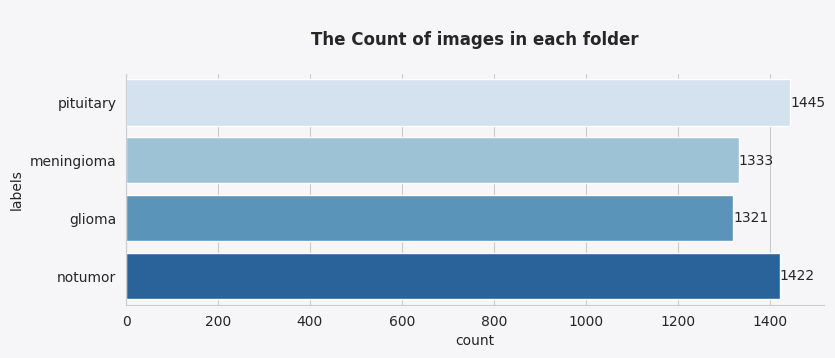

In [8]:
fig,ax=plt.subplots(figsize=(9,3))
fig.patch.set_facecolor("#f6f5f7")
ax.set_facecolor("#f6f5f7")
for i in ["top","right"]:
    ax.spines[i].set_visible(False)

x = sns.countplot(data=tr_df, y=tr_df["labels"],palette='Blues')
for container in x.containers:
    x.bar_label(container)
plt.title("\nThe Count of images in each folder\n",weight="bold");

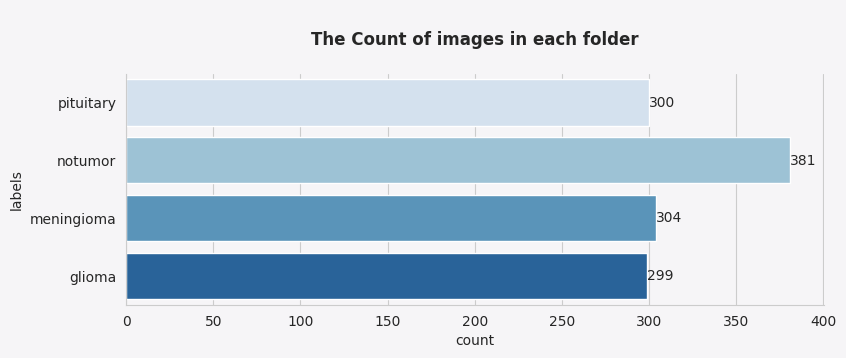

In [9]:
fig,ax=plt.subplots(figsize=(9,3))
fig.patch.set_facecolor("#f6f5f7")
ax.set_facecolor("#f6f5f7")
for i in ["right","top"]:
    ax.spines[i].set_visible(False)

i=sns.countplot(data=ts_df,y=ts_df["labels"],palette='Blues')
for container in i.containers:
    i.bar_label(container)

plt.title("\nThe Count of images in each folder\n",weight="bold");

In [10]:
ts_df.shape

(1284, 2)

In [11]:
valid_df,tst_df=train_test_split(ts_df,test_size=0.5,random_state=50,stratify=ts_df["labels"])
print(f"ts_df shape: {ts_df.shape}")
print("---"*10)
print(f"valid data shape: {valid_df.shape}")
print(f"test data shape: {tst_df.shape}")

ts_df shape: (1284, 2)
------------------------------
valid data shape: (642, 2)
test data shape: (642, 2)


In [12]:
valid_df

filepaths      labels
1033  /content/drive/MyDrive/pfa/pre_dataset/Testing...      glioma
1245  /content/drive/MyDrive/pfa/pre_dataset/Testing...      glioma
1242  /content/drive/MyDrive/pfa/pre_dataset/Testing...      glioma
560   /content/drive/MyDrive/pfa/pre_dataset/Testing...     notumor
689   /content/drive/MyDrive/pfa/pre_dataset/Testing...  meningioma
...                                                 ...         ...
662   /content/drive/MyDrive/pfa/pre_dataset/Testing...     notumor
646   /content/drive/MyDrive/pfa/pre_dataset/Testing...     notumor
299   /content/drive/MyDrive/pfa/pre_dataset/Testing...   pituitary
181   /content/drive/MyDrive/pfa/pre_dataset/Testing...   pituitary
273   /content/drive/MyDrive/pfa/pre_dataset/Testing...   pituitary

[642 rows x 2 columns]

In [13]:
img_size=(224,224)

tr=ImageDataGenerator()
ts=ImageDataGenerator()

train_gen=tr.flow_from_dataframe(tr_df,x_col="filepaths",y_col="labels",
                                 target_size=img_size,
                                 batch_size=16,shuffle=True,
                                 class_mode='categorical',color_mode="rgb")


valid_gen=ts.flow_from_dataframe(valid_df,x_col='filepaths',y_col='labels',
                                target_size=img_size,
                                 class_mode="categorical",color_mode="rgb",
                                 shuffle=True,batch_size=16,)


test_gen=ts.flow_from_dataframe(tst_df, x_col='filepaths', y_col='labels',
                                 target_size=img_size,
                                 batch_size=16, shuffle=False,
                                 color_mode="rgb", class_mode="categorical")

Found 5521 validated image filenames belonging to 4 classes.
Found 642 validated image filenames belonging to 4 classes.
Found 642 validated image filenames belonging to 4 classes.


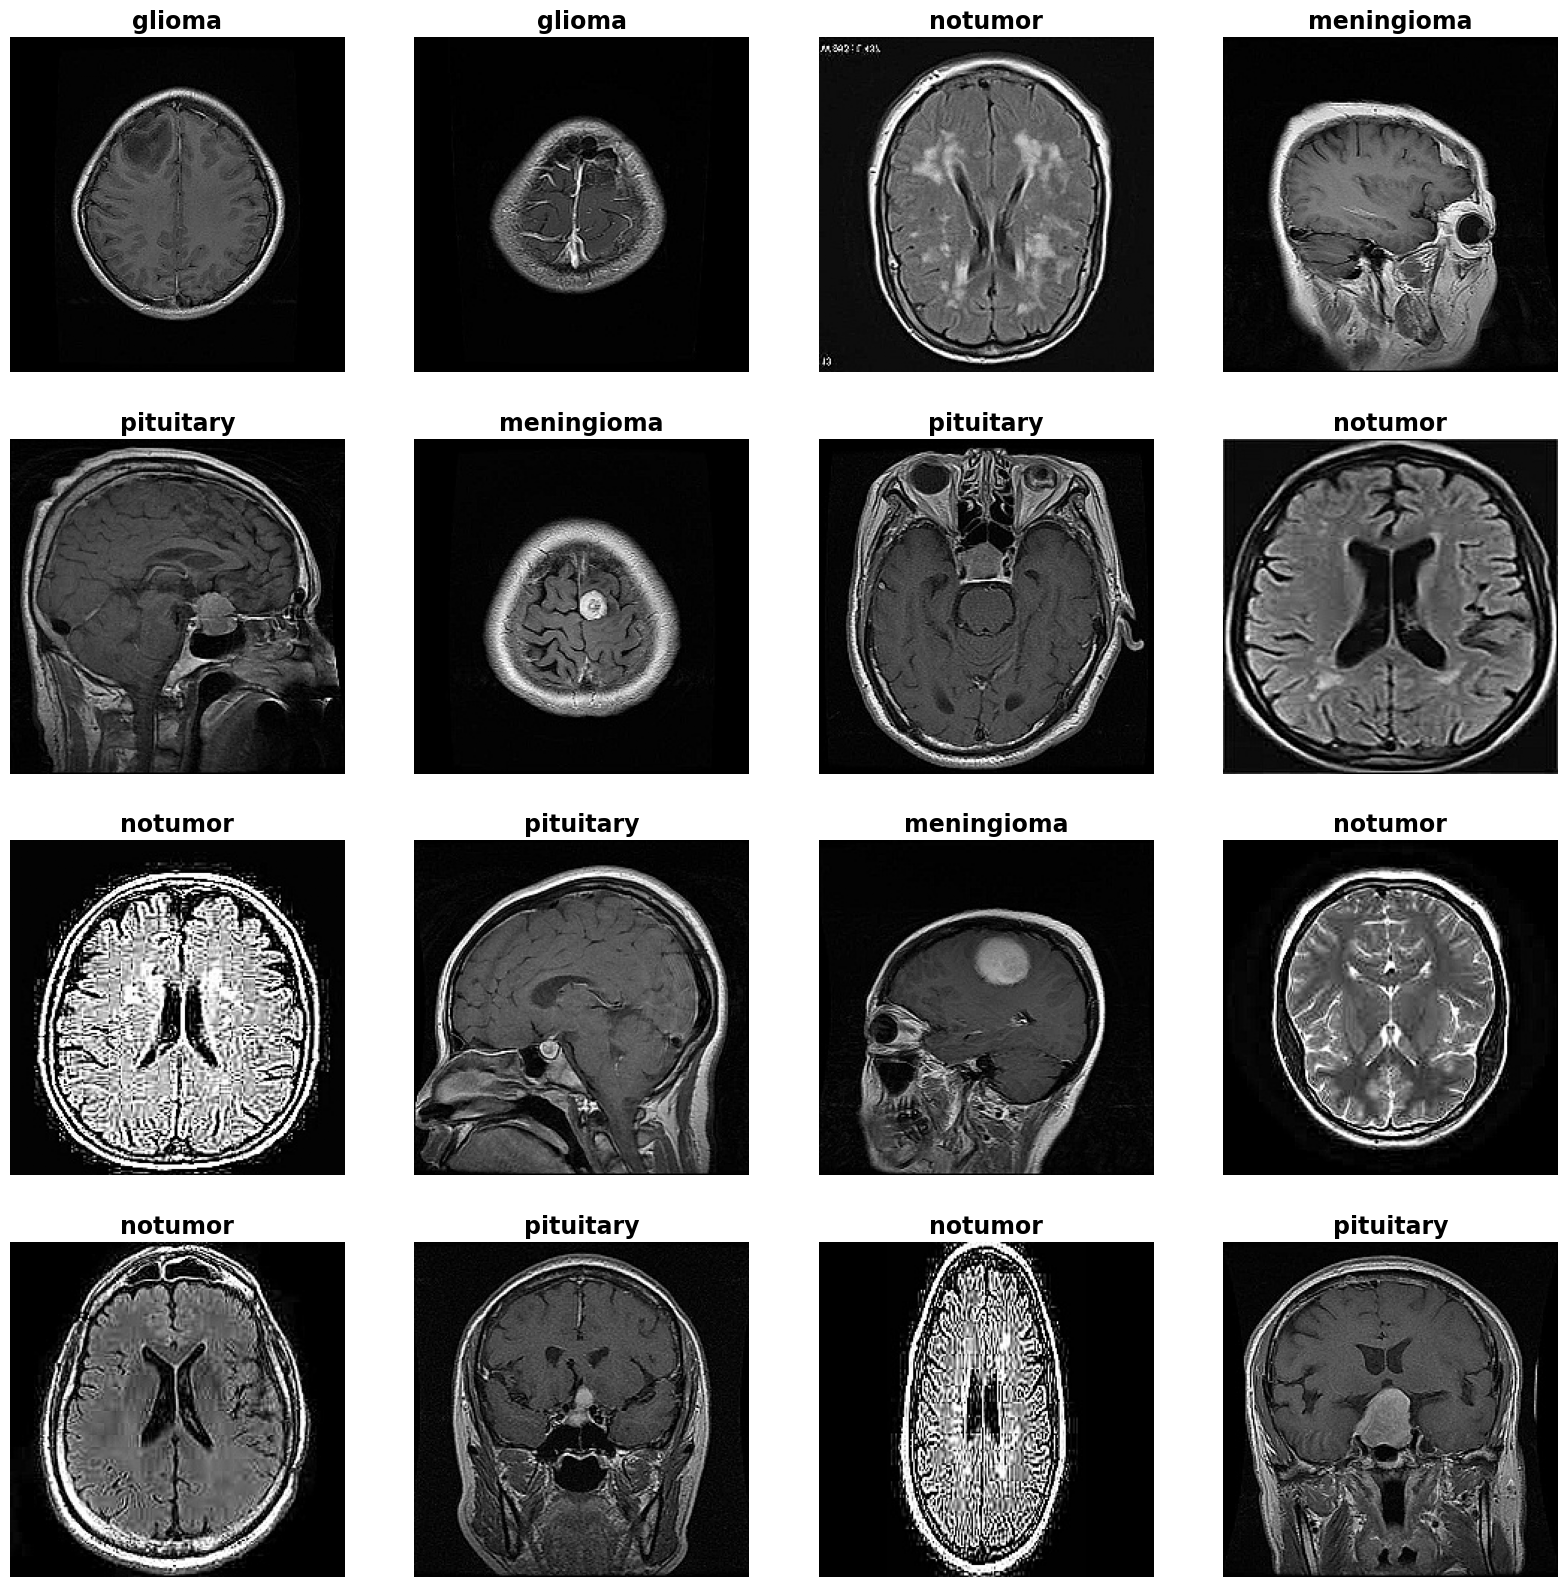

In [14]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'black' , fontsize= 17,weight="bold")
    plt.axis('off')
plt.show()

In [15]:
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet' ,
                                                               input_shape = img_shape, pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l= 0.016) , activity_regularizer = regularizers.l1(0.006),
         bias_regularizer= regularizers.l1(0.006) , activation = 'relu'),
    Dropout(rate= 0.4 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 11184179 (42.66 MB)
Trainable params: 1109

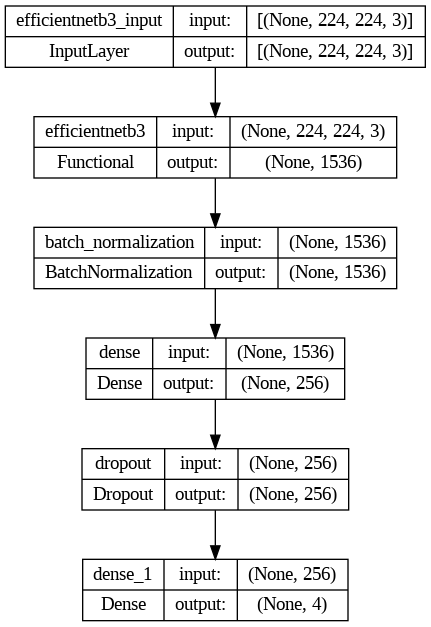

In [16]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [17]:
Epochs = 10
history = model.fit(x= train_gen , epochs = Epochs , verbose = 1 , validation_data = valid_gen ,validation_steps = None , shuffle = False)

Epoch 1/10
346/346 [==============================] - 160s 293ms/step - loss: 5.6252 - accuracy: 0.8834 - precision: 0.9009 - recall: 0.8642 - auc: 0.9753 - val_loss: 3.6491 - val_accuracy: 0.9517 - val_precision: 0.9661 - val_recall: 0.9330 - val_auc: 0.9968
Epoch 2/10
346/346 [==============================] - 97s 280ms/step - loss: 2.5678 - accuracy: 0.9562 - precision: 0.9665 - recall: 0.9420 - auc: 0.9955 - val_loss: 1.6601 - val_accuracy: 0.9829 - val_precision: 0.9844 - val_recall: 0.9813 - val_auc: 0.9995
Epoch 3/10
346/346 [==============================] - 97s 281ms/step - loss: 1.2035 - accuracy: 0.9765 - precision: 0.9811 - recall: 0.9681 - auc: 0.9982 - val_loss: 0.7842 - val_accuracy: 0.9875 - val_precision: 0.9890 - val_recall: 0.9813 - val_auc: 0.9998
Epoch 4/10
346/346 [==============================] - 95s 276ms/step - loss: 0.6087 - accuracy: 0.9837 - precision: 0.9872 - recall: 0.9799 - auc: 0.9988 - val_loss: 0.4138 - val_accuracy: 0.9907 - val_precision: 0.9922 - 

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])

<Figure size 2000x800 with 0 Axes>

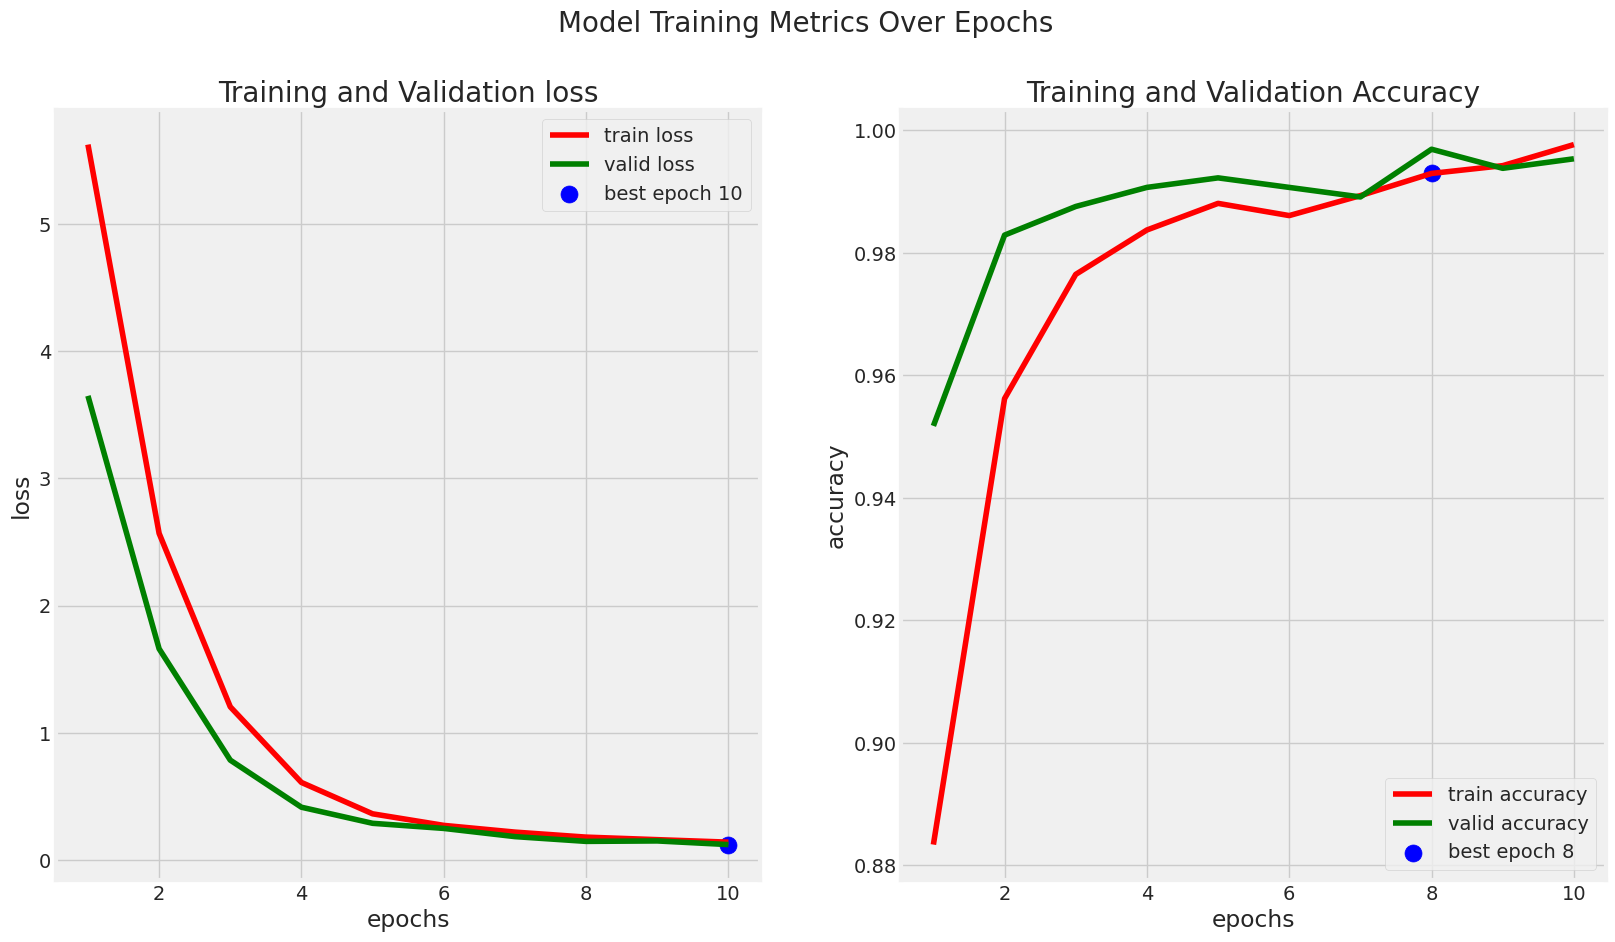

In [19]:
plt.figure(figsize=(20, 8))
tr_loss=history.history["loss"]
val_loss=history.history["val_loss"]
index_loss=np.argmin(val_loss)
loss_lowest=val_loss[index_loss]
l_label=f"best epoch {index_loss+1}"

tr_accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
index_acc=np.argmax(val_accuracy)
acc_highest=tr_accuracy[index_acc]
c_label=f"best epoch {index_acc+1}"

epochs=[i+1 for i in range (len(tr_accuracy))]


plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs,tr_loss,"r",label="train loss")
plt.plot(epochs,val_loss,"g",label="valid loss")
plt.scatter(index_loss+1,loss_lowest,c="b",s=150,label=l_label)
plt.title('Training and Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs,tr_accuracy,"r",label="train accuracy")
plt.plot(epochs,val_accuracy,"g",label="valid accuracy")
plt.scatter(index_acc+1,acc_highest,c="b",s=150,label=c_label)
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()


plt.suptitle('Model Training Metrics Over Epochs', fontsize=20);

In [ ]:
train_score=model.evaluate(train_gen)
valid_score=model.evaluate(valid_gen)
test_score=model.evaluate(test_gen)

print(f"Train Loss : {train_score[0]:.3f}")
print(f"Train Accuracy : {train_score[1]*100:.2f}%")
print("-"*20)
print(f"Validation Loss : {valid_score[0]:.3f}")
print(f"Validation Accuracy : {valid_score[1]*100:.2f}%")
print("-"*20)
print(f"Test Loss: {test_score[0]:.3f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

41/41 [==============================] - 165s 4s/step - loss: 0.1224 - accuracy: 0.9938 - precision: 0.9938 - recall: 0.9938 - auc: 0.9990


In [ ]:
preds=model.predict(test_gen)
print (preds)
y_pred=np.argmax(preds,axis=1)

41/41 [==============================] - 6s 101ms/step
[[9.9406165e-01 2.9298302e-03 1.9394159e-03 1.0691104e-03]
 [1.3140901e-03 1.4244494e-03 9.9645472e-01 8.0674660e-04]
 [2.8736633e-03 9.9223679e-01 2.1978794e-03 2.6916414e-03]
 ...
 [2.9221082e-03 9.9199998e-01 2.2948261e-03 2.7830123e-03]
 [7.5680041e-04 1.3666161e-03 7.1459846e-04 9.9716198e-01]
 [1.3624657e-03 2.3244089e-03 1.1906326e-03 9.9512249e-01]]


In [ ]:
def preprocess_image(image):
    img = Image.open(image)
    img = img.resize((224, 224))  # Resize image to match model input shape
    # img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img ,axis=0)  # Add batch dimension
    return img_array

In [ ]:
img5 = preprocess_image("/content/drive/MyDrive/pfa/pre_dataset/Testing/pituitary/Te-piTr_0006.jpg")

tested_img5 = model(img5)
y_pred5=np.argmax(tested_img5,axis=1)

print("pituitary , class index 3 ",y_pred5)

img7 = preprocess_image("/content/drive/MyDrive/pfa/pre_dataset/Testing/meningioma/Te-me_0024.jpg")

tested_img7 = model(img7)
y_pred7 =np.argmax(tested_img7,axis=1)

print("meningioma , class index 1 ",y_pred7)

img8 = preprocess_image("/content/drive/MyDrive/pfa/pre_dataset/Testing/glioma/Te-gl_0016.jpg")

tested_img8 = model(img8)
y_pred8=np.argmax(tested_img8,axis=1)

print( "glioma , class index 0 ", y_pred8 )

pituitary , class index 3  [3]
meningioma , class index 1  [1]
glioma , class index 0  [0]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour afficher les prédictions sur un lot de données de test
def visualize_predictions(model, test_gen, class_names, num_images=20):
    plt.figure(figsize=(18, 18))
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajuster les espaces entre les sous-graphiques

    # Obtenir un lot de données de test à l'aide de la méthode next
    images, labels = next(test_gen)

    # Obtenir les prédictions pour le lot de données de test
    predict_batch = model.predict(images)

    for i in range(min(len(images), num_images)):  # Parcourir les images jusqu'à un maximum de num_images
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i]/255.)  # Normaliser les pixels de l'image
        actual_label = class_names[np.argmax(labels[i])]  # Obtenir le nom de la classe réelle
        predicted_label = class_names[np.argmax(predict_batch[i])]  # Obtenir le nom de la classe prédite
        plt.title(f"Actual: {actual_label}\nPredected: {predicted_label}")
        plt.axis("off")

1/1 [==============================] - 3s 3s/step


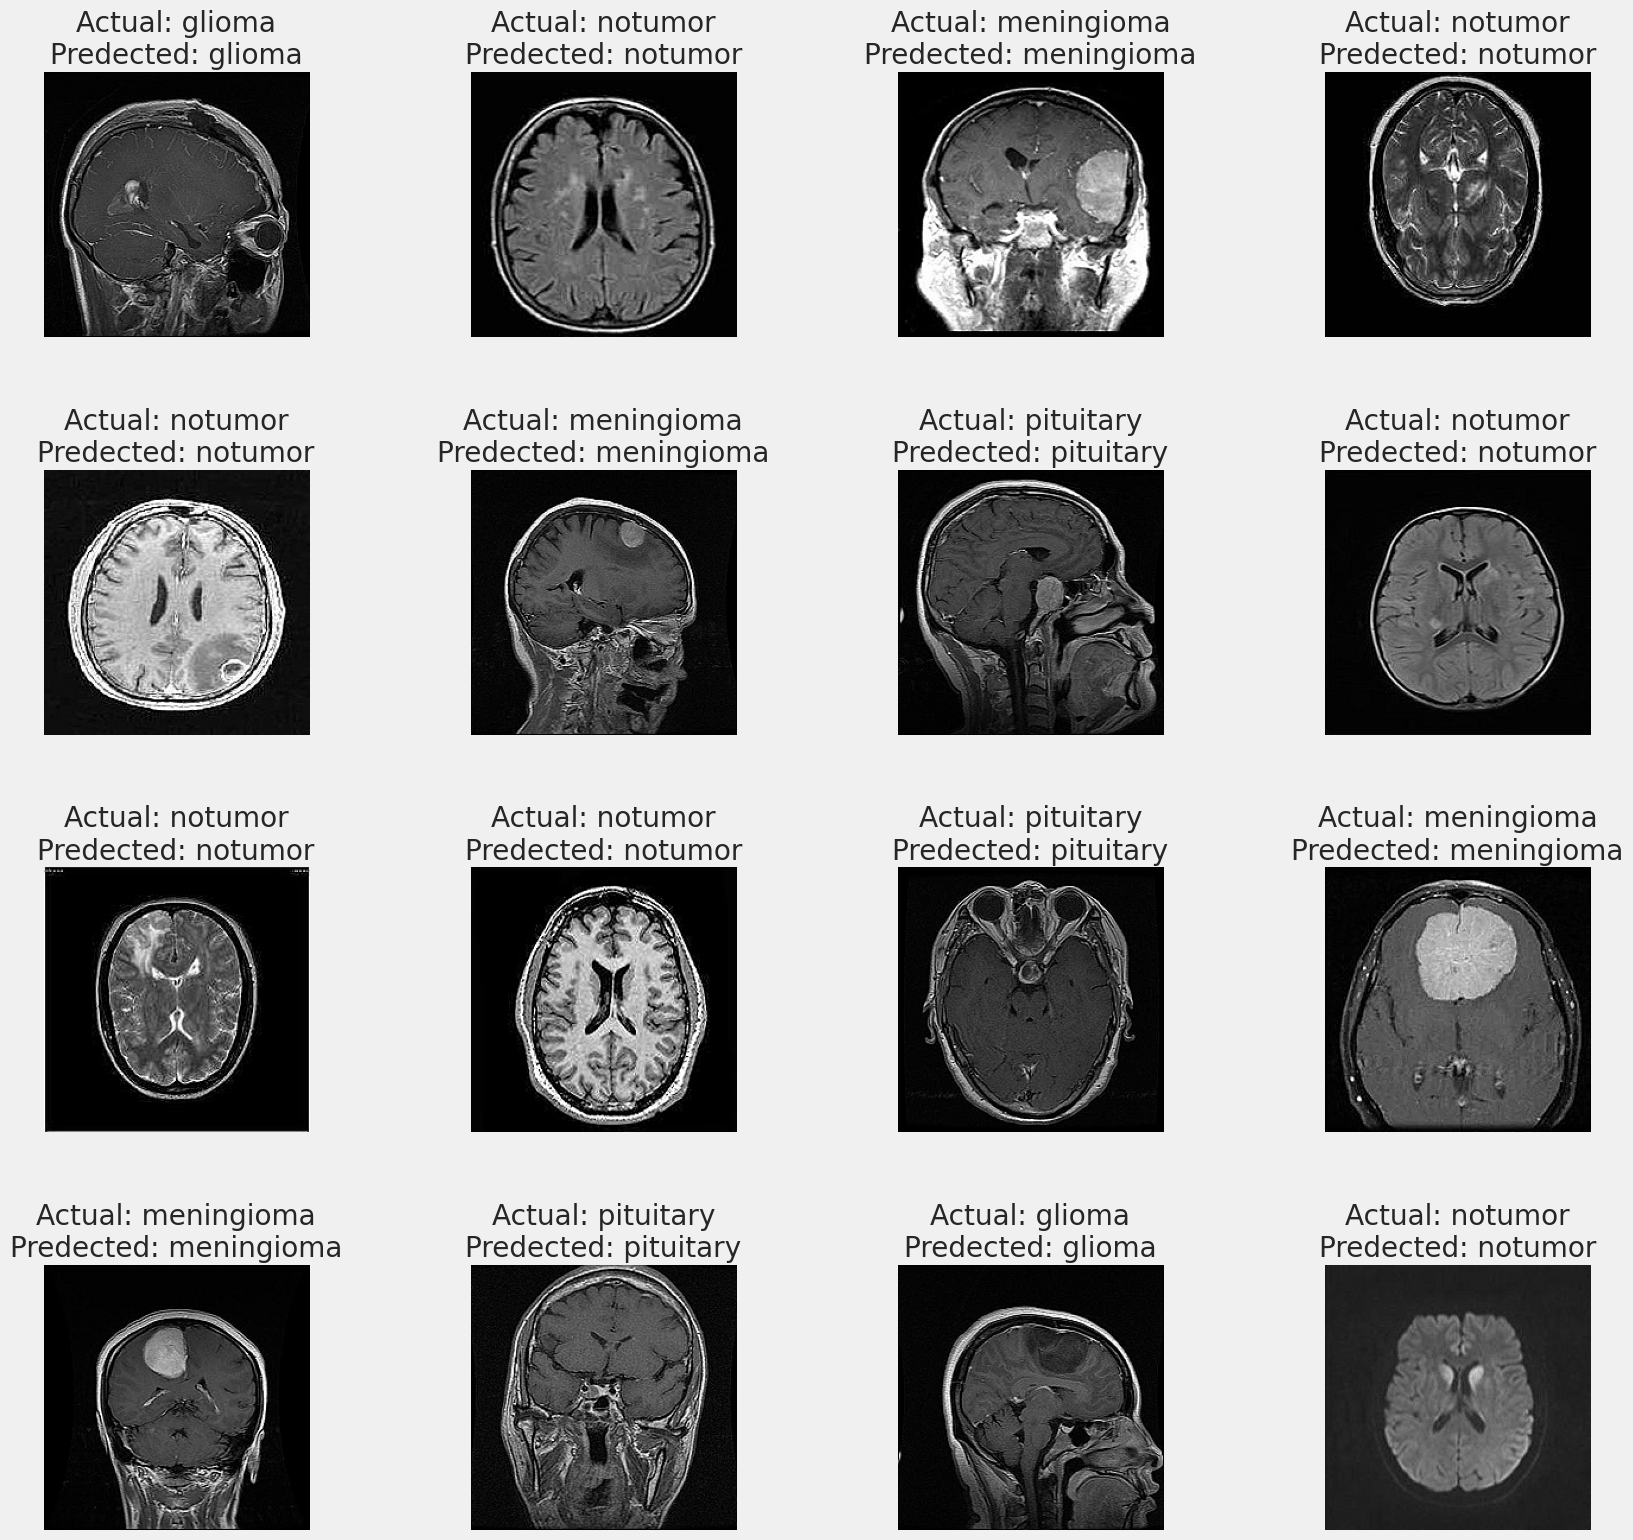

In [ ]:
# Liste des noms de classe
class_names = sorted(test_gen.class_indices.keys())  # Utilisez test_gen pour obtenir les noms de classe

# Afficher les prédictions pour un lot de données de test avec le modèle CNN
visualize_predictions( model, test_gen, class_names)

In [ ]:
scores = model.evaluate(test_gen, verbose=0)
results = []
epochs=10
result = {
            'Epochs': epochs,
            'Model': 'CNN',
            'Accuracy': f'{scores[1] * 100:.2f}%',
            'Precision': f'{scores[2] * 100:.2f}%',
            'Recall': f'{scores[3] * 100:.2f}%',
            'AUC': f'{scores[4]:.3f}',

        }
results.append(result)

# Créer le DataFrame Pandas
df = pd.DataFrame(results)
df

Epochs Model Accuracy Precision  Recall    AUC
0      10   CNN   99.07%    99.22%  98.91%  0.999

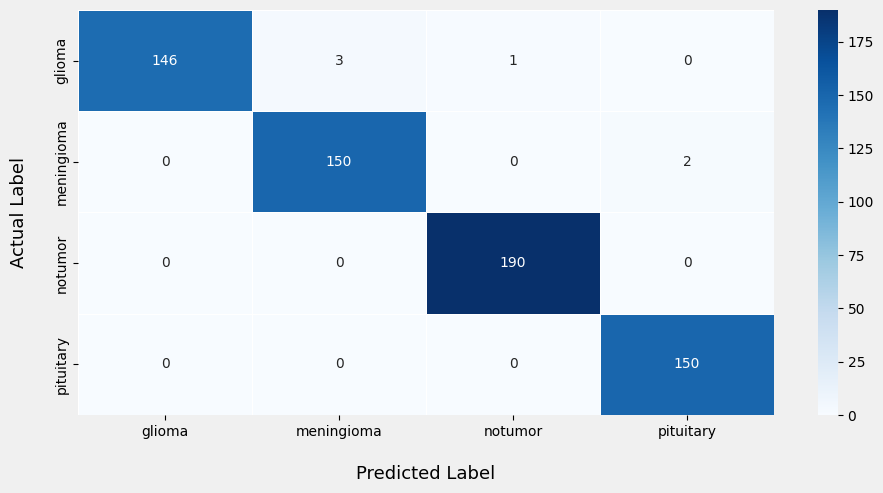

In [ ]:
plt.figure(figsize=(10,5))
plt.style.use('default')
cm=confusion_matrix(test_gen.classes,y_pred)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);

In [ ]:
cr=classification_report(test_gen.classes,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       150
           1       0.98      0.99      0.98       152
           2       0.99      1.00      1.00       190
           3       0.99      1.00      0.99       150

    accuracy                           0.99       642
   macro avg       0.99      0.99      0.99       642
weighted avg       0.99      0.99      0.99       642



In [ ]:
#Classification Report
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      glioma       1.00      0.97      0.99       150
  meningioma       0.98      0.99      0.98       152
     notumor       0.99      1.00      1.00       190
   pituitary       0.99      1.00      0.99       150

    accuracy                           0.99       642
   macro avg       0.99      0.99      0.99       642
weighted avg       0.99      0.99      0.99       642



In [ ]:
model_json = model.to_json()
with open("modele_architecture.json", "w") as json_file:
    json_file.write(model_json)


# serialize weights to HDF5
model.save("/content/drive/My Drive/pfa/Colab Notebooks/CNN_2.h5")

In [ ]:
import joblib

# Supposons que votre modèle est dans une variable appelée 'model'
joblib.dump(model, 'mon_modele.pkl')  # Sauvegarde le modèle sous forme de fichier pickle
